In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset (1).csv')

In [63]:
df.shape

(22, 8)

In [64]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

duplicates = df.duplicated()
print("Number of duplicates: ", duplicates.sum())

null_values = df.isnull()
print("Number of null values: ", null_values.sum().sum())

missing_values = df.isnull()
print("Number of missing values: ", missing_values.sum().sum())

Number of rows: 22
Number of columns: 8
Number of duplicates:  0
Number of null values:  0
Number of missing values:  0


In [65]:
df.tail()

,year,no_employees,cpi,ppi,gdp_rate,hcpi,ecpi,fcpi
17,2017,1267162,-1.16,2.63,7.57,-0.85,-0.73,-0.83
18,2018,1270780,3.06,-1.30,11.51,2.47,-1.26,6.48
19,2019,1283061,-0.36,16.01,0.49,-2.09,-8.58,2.07
20,2020,1264550,3.55,1.93,-7.71,3.45,-0.63,9.00
21,2021,1248021,4.90,3.48,14.79,3.06,-2.43,5.39


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          22 non-null     int64  
 1   no_employees  22 non-null     int64  
 2   cpi           22 non-null     float64
 3   ppi           22 non-null     float64
 4   gdp_rate      22 non-null     float64
 5   hcpi          22 non-null     float64
 6   ecpi          22 non-null     float64
 7   fcpi          22 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 1.5 KB


In [67]:
df.describe()

,year,no_employees,cpi,ppi,gdp_rate,hcpi,ecpi,fcpi
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2010.500000,1.010994e+06,0.771818,1.088182,5.032273,2.274091,0.561364,3.615000
std,6.493587,2.280292e+05,1.915813,3.500451,10.286868,2.770530,2.963409,3.779292
min,2000.000000,6.947700e+05,-2.540000,-1.300000,-16.910000,-2.090000,-8.580000,-1.700000
25%,2005.250000,7.883728e+05,-0.855000,0.000000,-1.535000,0.490000,0.000000,0.822500
50%,2010.500000,9.789855e+05,1.040000,0.000000,6.760000,2.225000,0.000000,2.880000
75%,2015.750000,1.247218e+06,1.985000,0.232500,11.555000,3.495000,2.127500,5.720000
max,2021.000000,1.283061e+06,4.900000,16.010000,20.150000,9.870000,5.580000,14.110000


In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['no_employees', 'cpi', 'ppi', 'gdp_rate', 'hcpi', 'ecpi', 'fcpi']

scaler = MinMaxScaler()
scaler.fit(df[cols_to_scale])

df[cols_to_scale] = scaler.transform(df[cols_to_scale])
df.head()

,year,no_employees,cpi,ppi,gdp_rate,hcpi,ecpi,fcpi
0,2000,0.000000,0.216398,0.075101,0.751754,0.081104,0.704802,0.000000
1,2001,0.027349,0.061828,0.075101,0.412035,0.081104,0.605932,0.145478
2,2002,0.056465,0.256720,0.075101,0.616838,0.195652,0.605932,0.069576
3,2003,0.088725,0.201613,0.075101,0.518888,0.225753,0.612994,0.270715
4,2004,0.116430,0.190860,0.075101,0.754722,0.218227,0.605932,0.282100


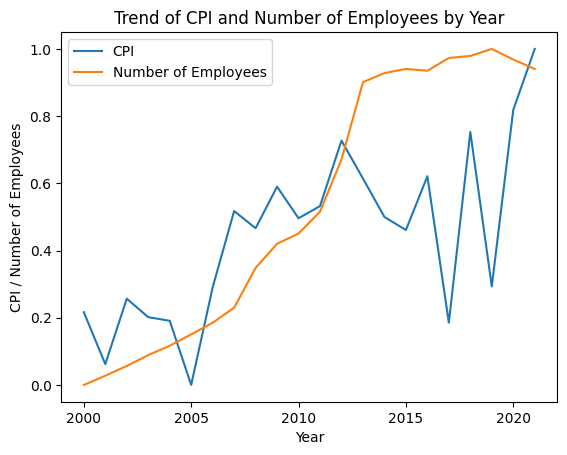

In [72]:
yearly_data = df.groupby('year').mean()

cpi = yearly_data['cpi']
no_of_employees = yearly_data['no_employees']

plt.plot(cpi, label='CPI')
plt.plot(no_of_employees, label='Number of Employees')

plt.title('Trend of CPI and Number of Employees by Year')
plt.xlabel('Year')
plt.ylabel('CPI / Number of Employees')

plt.legend()

plt.show()

1. The CPI (Consumer Price Index) is a measure of inflation that tracks the average change in prices of goods and services purchased by households over time. A high CPI indicates a high rate of inflation, while a low CPI indicates a low rate of inflation.
2. Whether a high or low CPI is better for a country depends on the specific circumstances. In general, a low and stable rate of inflation is desirable for most economies.
3. However, some economists argue that a very low or negative inflation rate can also have negative consequences, such as the risk of deflation, which can lead to lower economic growth and higher unemployment

1. In Saudia Arabia, as the no of employees increased a little from 2000 to 2003, the cpi can be seen increasing.
2. In 2006-7, the cpi increases drastically resulting in high inflation.
3. In 2013, the cpi again rises drastically.
4. between 2013-2015, the employee intake was stable, so the cpi also is found to be stable and does not flicker a lot.
5. according to employee data, maximum employee were working during 2019-2021, thus the cpi rises to max till date.
6. in 2016 and 2019, the cpi drastically drops (negative cpi), results in deflation

In [80]:
df

,year,no_employees,cpi,ppi,gdp_rate,hcpi,ecpi,fcpi
0,2000,0.000000,0.216398,0.075101,0.751754,0.081104,0.704802,0.000000
1,2001,0.027349,0.061828,0.075101,0.412035,0.081104,0.605932,0.145478
2,2002,0.056465,0.256720,0.075101,0.616838,0.195652,0.605932,0.069576
3,2003,0.088725,0.201613,0.075101,0.518888,0.225753,0.612994,0.270715
4,2004,0.116430,0.190860,0.075101,0.754722,0.218227,0.605932,0.282100
5,2005,0.150446,0.000000,0.075101,1.000000,0.214883,0.605932,0.297280
6,2006,0.185101,0.290323,0.075101,0.768484,0.359532,0.605932,0.445288
7,2007,0.229844,0.517473,0.075101,0.683756,0.523411,0.605932,0.548387
8,2008,0.348367,0.466398,0.075101,0.933621,1.000000,0.605932,1.000000
9,2009,0.420081,0.590054,0.075101,0.032380,0.597826,0.605932,0.231499


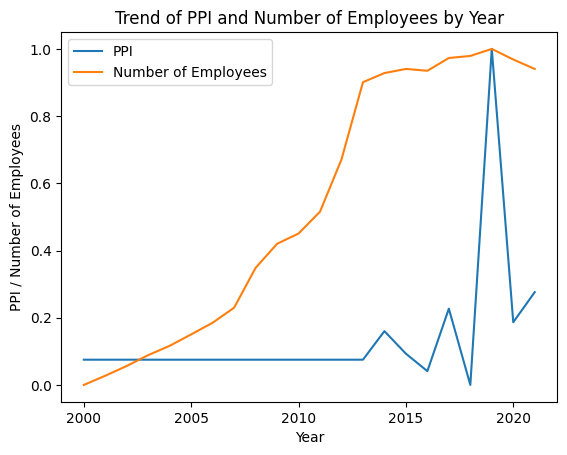

In [81]:
yearly_data = df.groupby('year').mean()

ppi = yearly_data['ppi']
no_of_employees = yearly_data['no_employees']

plt.plot(ppi, label='PPI')
plt.plot(no_of_employees, label='Number of Employees')

plt.title('Trend of PPI and Number of Employees by Year')
plt.xlabel('Year')
plt.ylabel('PPI / Number of Employees')

plt.legend()

plt.show()

1. PPI stands for "Producer Price Index," which is a measure of the average change over time in the selling prices received by domestic producers for their output.
2. very high PPI inflation can be a sign of cost pressures that could eventually result in higher consumer prices and inflation, which can negatively impact the economy.
3. low PPI inflation may indicate weak demand and sluggish economic growth, it can also help keep consumer prices low and stable, which can support consumer purchasing power and overall economic stability.
4. In general, a moderate level of PPI inflation can be positive for an economy

1. In 2019, maximum employee were working/hired, The ppi can be seen at peak, thus it clearly specifies that hiring lot of people can reult into high ppi and high rate of inflation.
2. we ignore the data from 2000 to 2013, because that data was missing
3. we also ignore data of 2018 because the ppi was 0 that year, for 2016 the ppi was very low inspite the increase in employees,  other factors may have caused that.

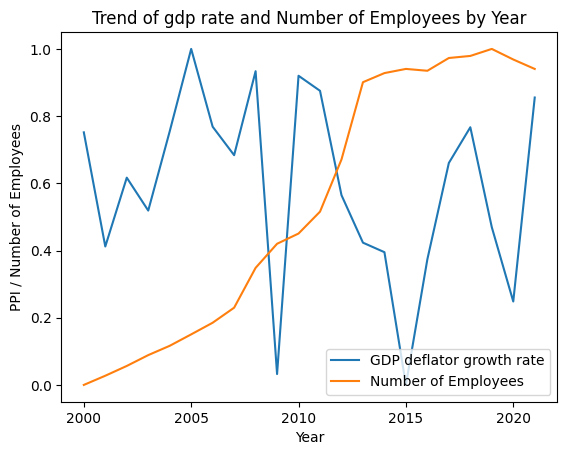

In [82]:
yearly_data = df.groupby('year').mean()

gdp = yearly_data['gdp_rate']
no_of_employees = yearly_data['no_employees']

plt.plot(gdp, label='GDP deflator growth rate')
plt.plot(no_of_employees, label='Number of Employees')

plt.title('Trend of gdp rate and Number of Employees by Year')
plt.xlabel('Year')
plt.ylabel('PPI / Number of Employees')

plt.legend()

plt.show()

1. The GDP deflator is a measure of the overall price level of goods and services produced in an economy, and the growth rate of the GDP deflator reflects changes in this overall price level over time.
2. In general, a moderate level of GDP deflator growth can be positive for an economy, as it can signal healthy economic growth and investment, and help maintain price stability. Generally, a moderate and stable growth rate is often viewed as desirable for a healthy economy.


For a healthy economy, the gdp deflator rate needs to stable, but as the no of emplyees increases the gdp rate keeps on flickering, sometimes dropping and sometimes rising to its peak, thus the economy doesnt seem to be healthy for saudia arabia